In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, boxcox

warnings.filterwarnings("ignore")

# Load Data

In [2]:
train = pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
test = pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

enrolleeId = test["enrollee_id"]

# Data Analysis

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
print(f"Shape of train data: {train.shape}; Shape of test data: {test.shape}")

Shape of train data: (19158, 14); Shape of test data: (2129, 13)


In [6]:
print(f" Columns in tran data: {train.columns}", end="\n\n--------------------------------------------\n\n")
print(f"Columns in test data: {test.columns}")

 Columns in tran data: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

--------------------------------------------

Columns in test data: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')


In [7]:
print(f"Description of data:\n\n")
train.info()

Description of data:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), 

In [8]:
print(f"Summary of train data:\n\n")
train.describe().T

Summary of train data:




,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [9]:
print(f"Count of city:\n\n{train['city'].value_counts()}")
print(f"\n\nnull value count-------------------->: {train['city'].isnull().sum()}")

Count of city:

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


null value count-------------------->: 0


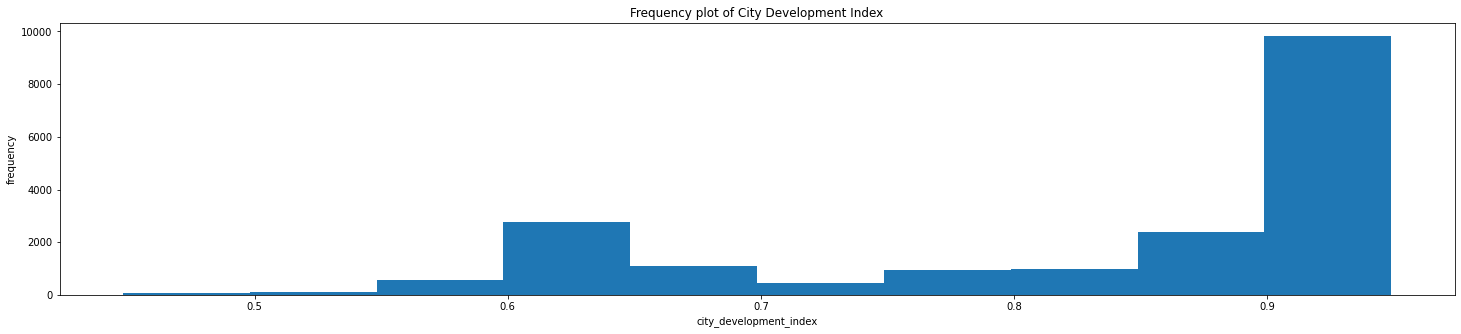



null value count-------------------->: 0


In [10]:
fig, axes = plt.subplots(figsize=(25,5))
plt.hist(train['city_development_index'],bins=10)
plt.ylabel("frequency")
plt.xlabel("city_development_index")
plt.title("Frequency plot of City Development Index")
plt.show()
print(f"\n\nnull value count-------------------->: {train['city_development_index'].isnull().sum()}")

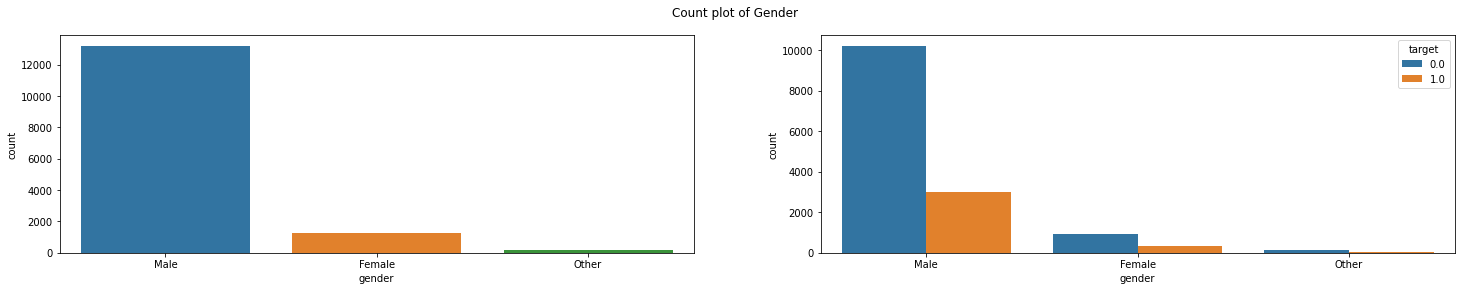



null values count-------------------->: 4508


In [11]:
fig, axes = plt.subplots(ncols=2,figsize=(25,4))
sns.countplot(x=train["gender"],ax=axes[0])
sns.countplot(x=train["gender"],hue="target",data=train,ax=axes[1])
fig.suptitle("Count plot of Gender")
axes[0].set_xlabel("gender")
axes[0].set_ylabel("count")
axes[1].set_xlabel("gender")
axes[1].set_ylabel("count")
plt.show()

print(f"\n\nnull values count-------------------->: {train['gender'].isnull().sum()}")

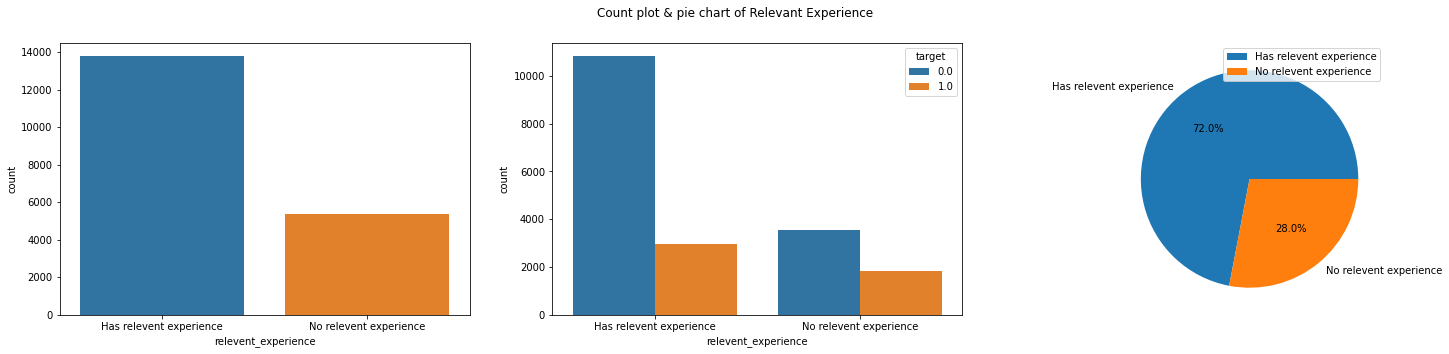



null values count-------------------->: 0


In [12]:
fig, axes = plt.subplots(ncols=3,figsize=(25,5))
count = train['relevent_experience'].value_counts()
sns.countplot(x=train["relevent_experience"],ax=axes[0])
sns.countplot(x=train["relevent_experience"],hue="target",data=train,ax=axes[1])
axes[2].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart of Relevant Experience")
axes[0].set_xlabel("relevent_experience")
axes[0].set_ylabel("count")
axes[1].set_xlabel("relevent_experience")
axes[1].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['relevent_experience'].isnull().sum()}")

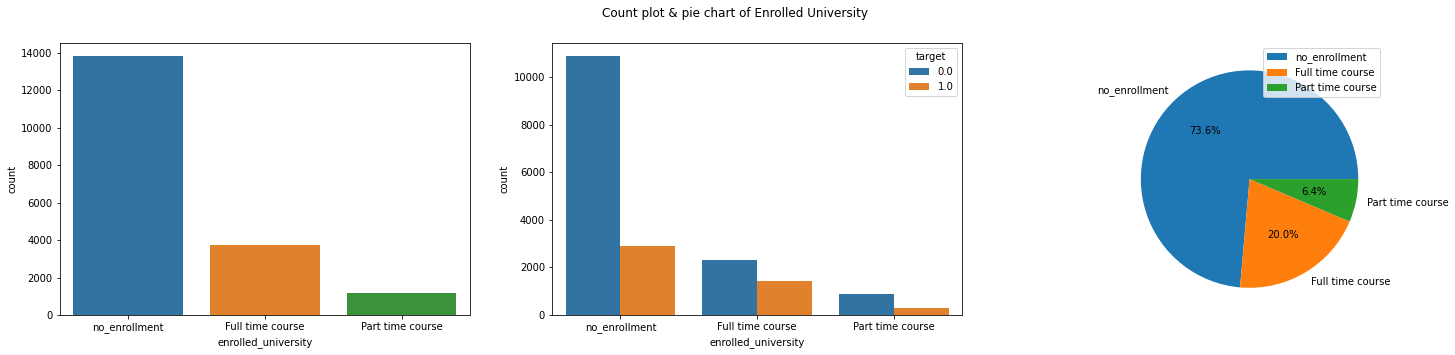



null values count-------------------->: 386


In [13]:
fig, axes = plt.subplots(ncols=3,figsize=(25,5))
count = train['enrolled_university'].value_counts()
sns.countplot(x=train["enrolled_university"],ax=axes[0])
sns.countplot(x=train["enrolled_university"],hue="target",data=train,ax=axes[1])
axes[2].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart of Enrolled University")
axes[0].set_xlabel("enrolled_university")
axes[0].set_ylabel("count")
axes[1].set_xlabel("enrolled_university")
axes[1].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['enrolled_university'].isnull().sum()}")

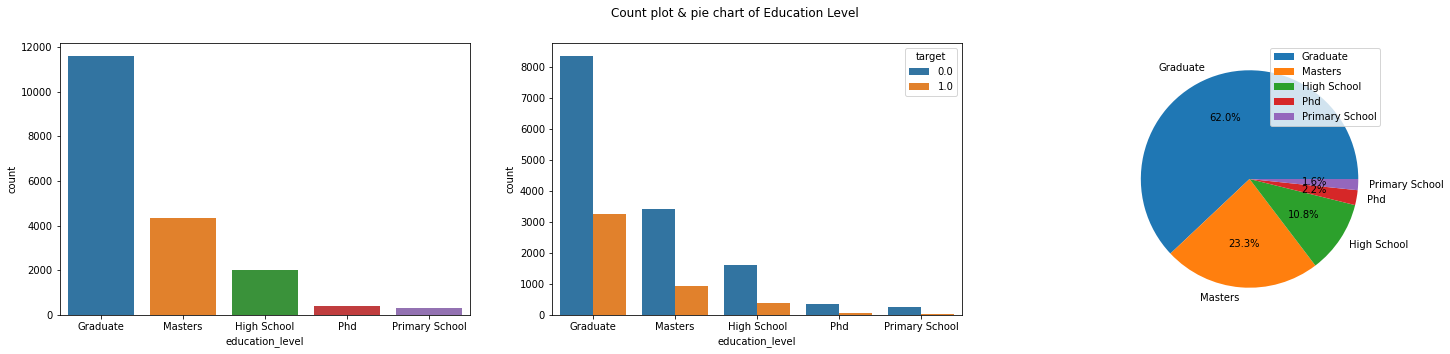



null values count-------------------->: 460


In [14]:
fig, axes = plt.subplots(ncols=3,figsize=(25,5))
count = train['education_level'].value_counts()
sns.countplot(x=train["education_level"],ax=axes[0])
sns.countplot(x=train["education_level"],hue="target",data=train,ax=axes[1])
axes[2].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart of Education Level")
axes[0].set_xlabel("education_level")
axes[0].set_ylabel("count")
axes[1].set_xlabel("education_level")
axes[1].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['education_level'].isnull().sum()}")

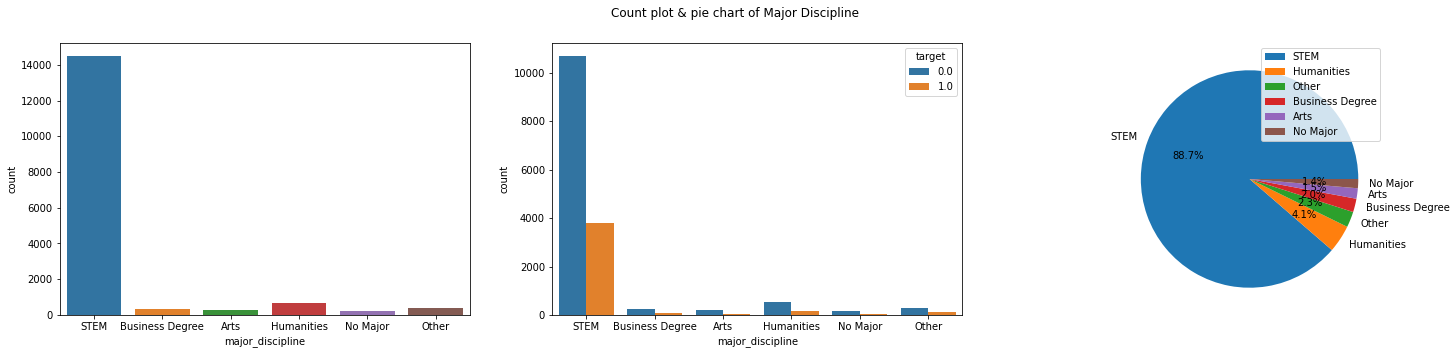



null values count-------------------->: 2813


In [15]:

fig, axes = plt.subplots(ncols=3,figsize=(25,5))
count = train['major_discipline'].value_counts()
sns.countplot(x=train["major_discipline"],ax=axes[0])
sns.countplot(x=train["major_discipline"],hue="target",data=train,ax=axes[1])
axes[2].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart of Major Discipline")
axes[0].set_xlabel("major_discipline")
axes[0].set_ylabel("count")
axes[1].set_xlabel("major_discipline")
axes[1].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['major_discipline'].isnull().sum()}")

In [16]:
print(f"Count of experience:\n\n{train['experience'].value_counts()}")
print(f"\n\nnull value count-------------------->: {train['experience'].isnull().sum()}")

Count of experience:

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


null value count-------------------->: 65


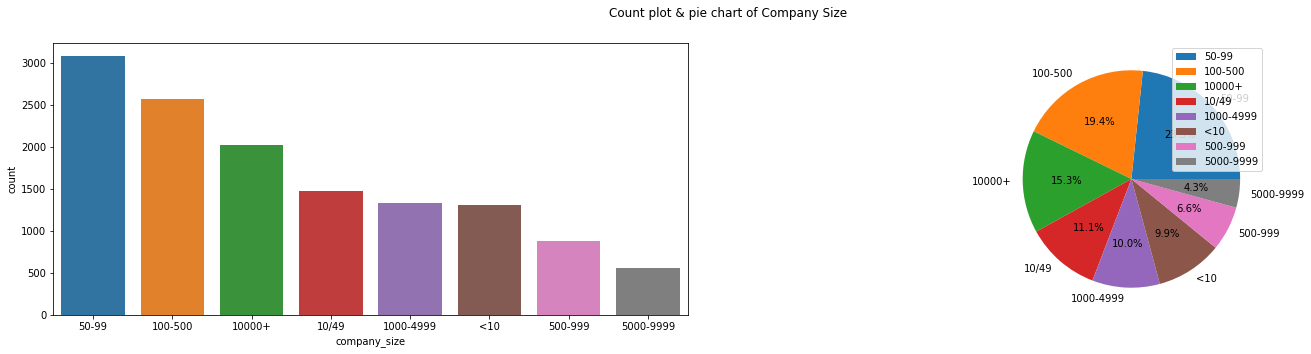



null values count-------------------->: 5938


In [17]:
fig, axes = plt.subplots(ncols=2,figsize=(25,5))
count = train['company_size'].value_counts()
sns.barplot(x=count.index,y=count.values,ax=axes[0])
axes[1].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart of Company Size")
axes[0].set_xlabel("company_size")
axes[0].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['company_size'].isnull().sum()}")

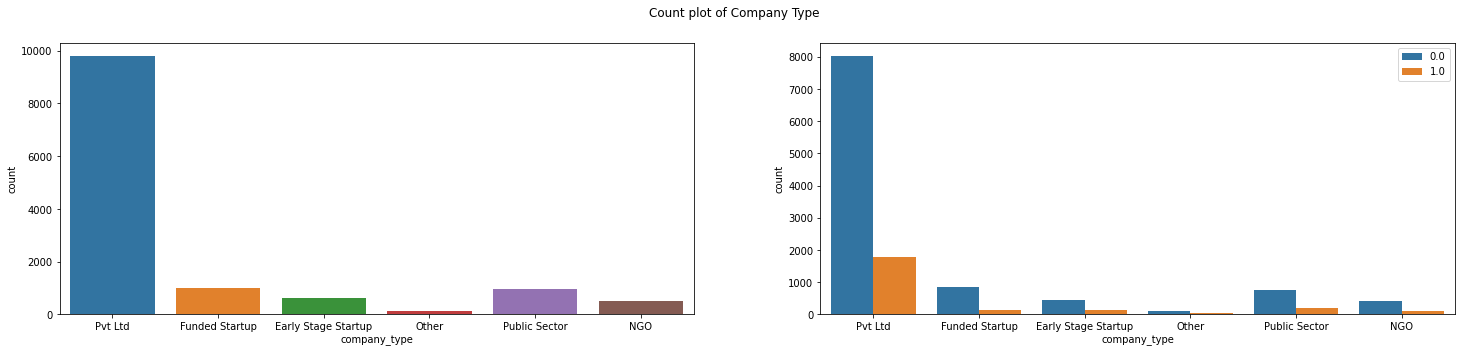



null values count-------------------->: 6140


In [18]:
fig, axes = plt.subplots(ncols=2,figsize=(25,5))
sns.countplot(x=train["company_type"],ax=axes[0])
sns.countplot(x=train["company_type"],hue="target",data=train,ax=axes[1])
fig.suptitle("Count plot of Company Type")
axes[0].set_xlabel("company_type")
axes[0].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['company_type'].isnull().sum()}")

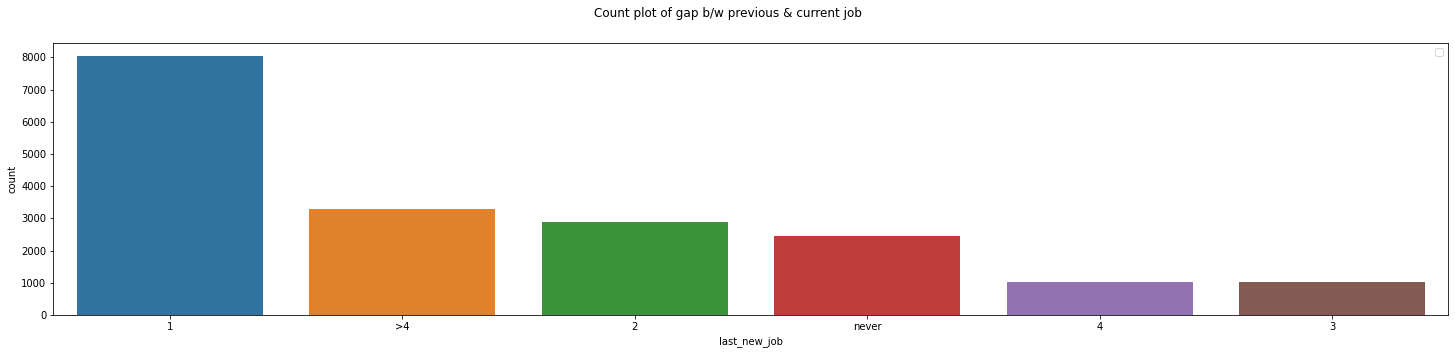



null values count-------------------->: 423


In [19]:
fig, axes = plt.subplots(figsize=(25,5))
count = train['last_new_job'].value_counts()
sns.barplot(x=count.index,y=count.values,ax=axes)
fig.suptitle("Count plot of gap b/w previous & current job")
axes.set_xlabel("last_new_job")
axes.set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['last_new_job'].isnull().sum()}")

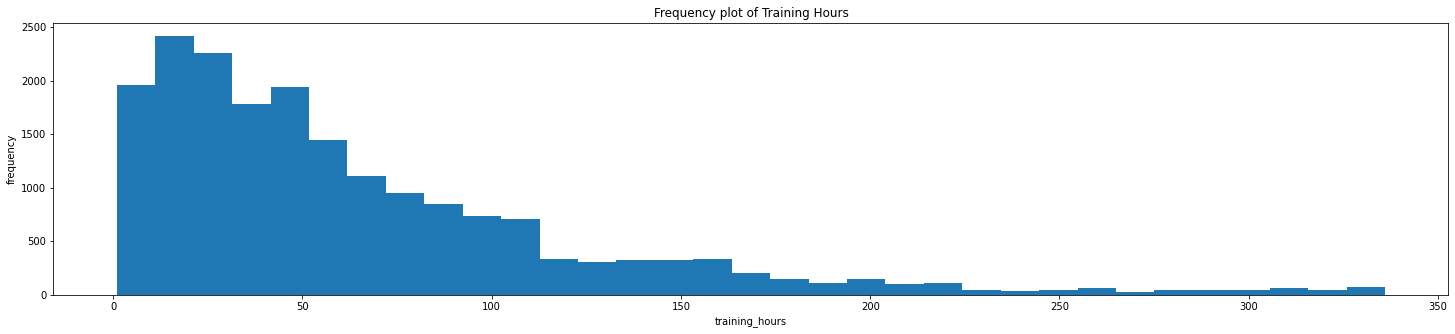



null value count-------------------->: 0


In [20]:
fig, axes = plt.subplots(figsize=(25,5))
plt.hist(train['training_hours'],bins=33)
plt.ylabel("frequency")
plt.xlabel("training_hours")
plt.title("Frequency plot of Training Hours")
plt.show()
print(f"\n\nnull value count-------------------->: {train['training_hours'].isnull().sum()}")

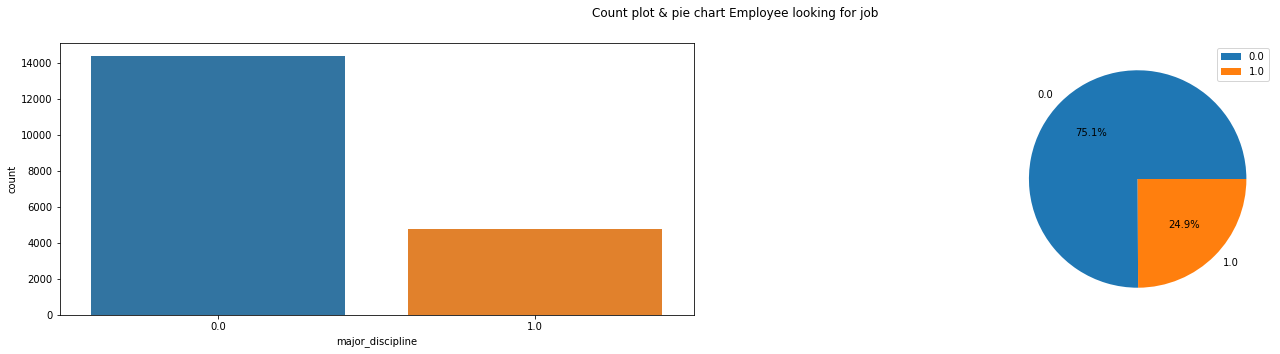



null values count-------------------->: 0


In [21]:

fig, axes = plt.subplots(ncols=2,figsize=(25,5))
count = train['target'].value_counts()
sns.countplot(x=train["target"],ax=axes[0])
axes[1].pie(x=count.values,labels=count.index,autopct='%1.1f%%')
fig.suptitle("Count plot & pie chart Employee looking for job")
axes[0].set_xlabel("major_discipline")
axes[0].set_ylabel("count")
plt.legend()
plt.show()

print(f"\n\nnull values count-------------------->: {train['target'].isnull().sum()}")

In [22]:
train[['last_new_job','target']].groupby(['last_new_job'], as_index=False).mean().sort_values(by="target")

,last_new_job,target
4,>4,0.182371
3,4,0.221574
2,3,0.225586
1,2,0.241379
0,1,0.264303
5,never,0.301387


In [23]:
train[['company_type','target']].groupby(['company_type'], as_index=False).mean().sort_values(by="target")

,company_type,target
1,Funded Startup,0.139860
5,Pvt Ltd,0.180809
2,NGO,0.186180
4,Public Sector,0.219895
0,Early Stage Startup,0.235489
3,Other,0.239669


In [24]:
train[['company_size','target']].groupby(['company_size'], as_index=False).mean().sort_values(by="target")

,company_size,target
2,1000-4999,0.150602
1,100-500,0.161416
7,<10,0.171254
5,500-999,0.173318
4,50-99,0.176776
6,5000-9999,0.181172
3,10000+,0.190688
0,10/49,0.233855


In [25]:
train[['major_discipline','target']].groupby(['major_discipline'], as_index=False).mean().sort_values(by="target")

,major_discipline,target
0,Arts,0.209486
2,Humanities,0.210762
3,No Major,0.246637
5,STEM,0.261593
1,Business Degree,0.262997
4,Other,0.267717


In [26]:
train[['education_level','target']].groupby(['education_level'], as_index=False).mean().sort_values(by="target")

,education_level,target
4,Primary School,0.133117
3,Phd,0.140097
1,High School,0.195340
2,Masters,0.214400
0,Graduate,0.279790


In [27]:
train[['enrolled_university','target']].groupby(['enrolled_university'], as_index=False).mean().sort_values(by="target")

,enrolled_university,target
2,no_enrollment,0.211406
1,Part time course,0.252087
0,Full time course,0.380889


In [28]:
train[['relevent_experience','target']].groupby(['relevent_experience'], as_index=False).mean().sort_values(by="target")

,relevent_experience,target
0,Has relevent experience,0.214690
1,No relevent experience,0.338427


In [29]:
train[['gender','target']].groupby(['gender'], as_index=False).mean().sort_values(by="target")

,gender,target
1,Male,0.227819
2,Other,0.261780
0,Female,0.263328


**Insights**
* Dataset is unbalanced.
* Certain attributes like major discipline have highly unbalanced categorical value
* Graduates, early startup company, female, full time enrolled e.t.c employee's has a higher possibility for looking a new job.

**Missing Values**

In [30]:
train_len = len(train)
train = pd.concat([train,test]).reset_index(drop=True)
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [31]:
print(f"Columns having null values --> {train.columns[train.isnull().any()]}")

Columns having null values --> Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job', 'target'],
      dtype='object')


In [32]:
print(f"Count of null values:\n\n")
train.isnull().sum()

Count of null values:




enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [33]:
def missing_value(data):
    data_len = len(data)
    cols = data.columns[data.isnull().any()]
    value = train[cols].isnull().sum()
    missing_len = len(cols)
    print(f"{missing_len} columns having missing value\n\n")
    df = pd.DataFrame(columns=['missing_value','ratio%'])
    for i in range(missing_len):
        ind, val = cols[i], value[i]
        df.loc[ind,'missing_value'], df.loc[ind,'ratio%'] = val, round(100.0*val/data_len,2)
    df.sort_values(by='missing_value',inplace=True)
    return df

In [34]:
missing_val = missing_value(train)
missing_val

9 columns having missing value




,missing_value,ratio%
experience,70,0.33
enrolled_university,417,1.96
last_new_job,463,2.18
education_level,512,2.41
target,2129,10.0
major_discipline,3125,14.68
gender,5016,23.56
company_size,6560,30.82
company_type,6774,31.82


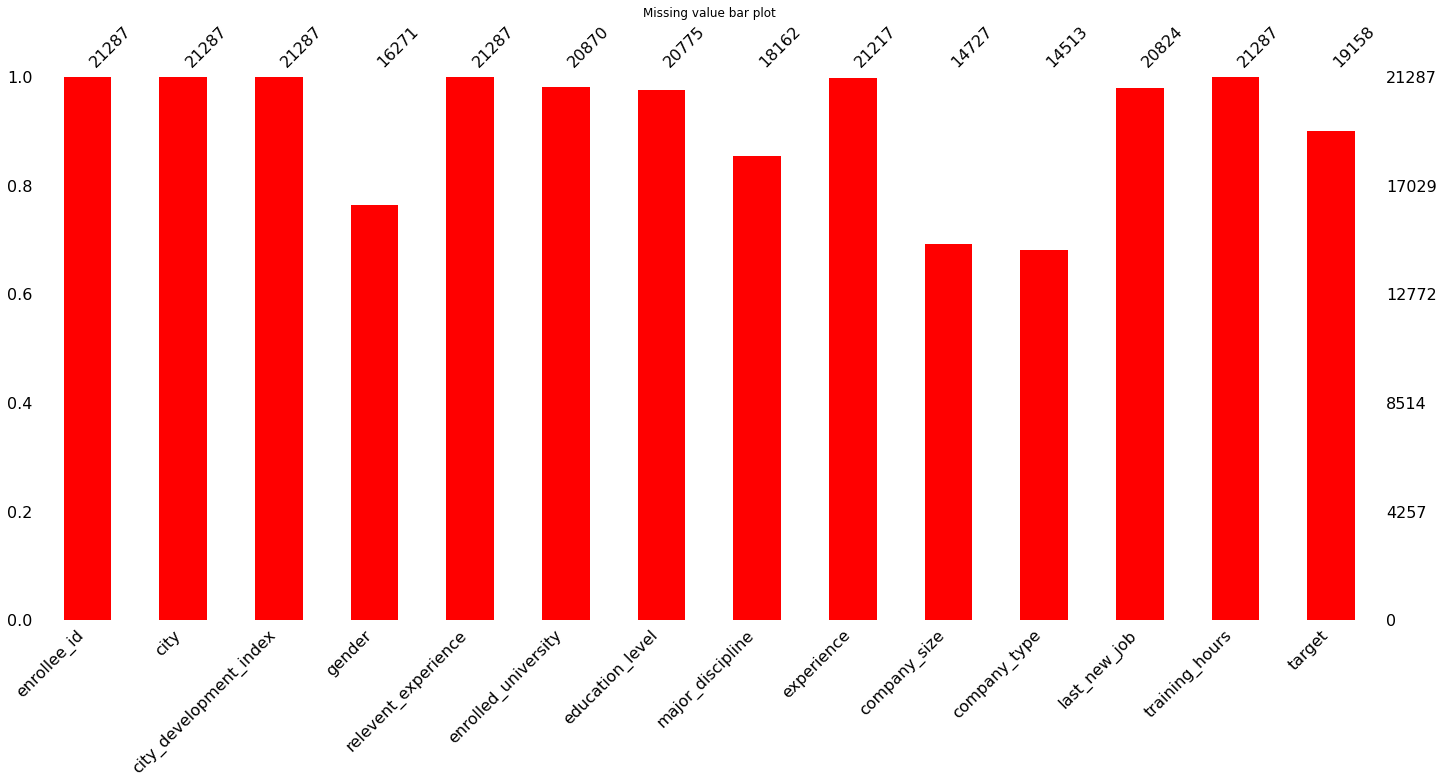

In [35]:
msno.bar(train,color="red")
plt.title("Missing value bar plot")
plt.show()

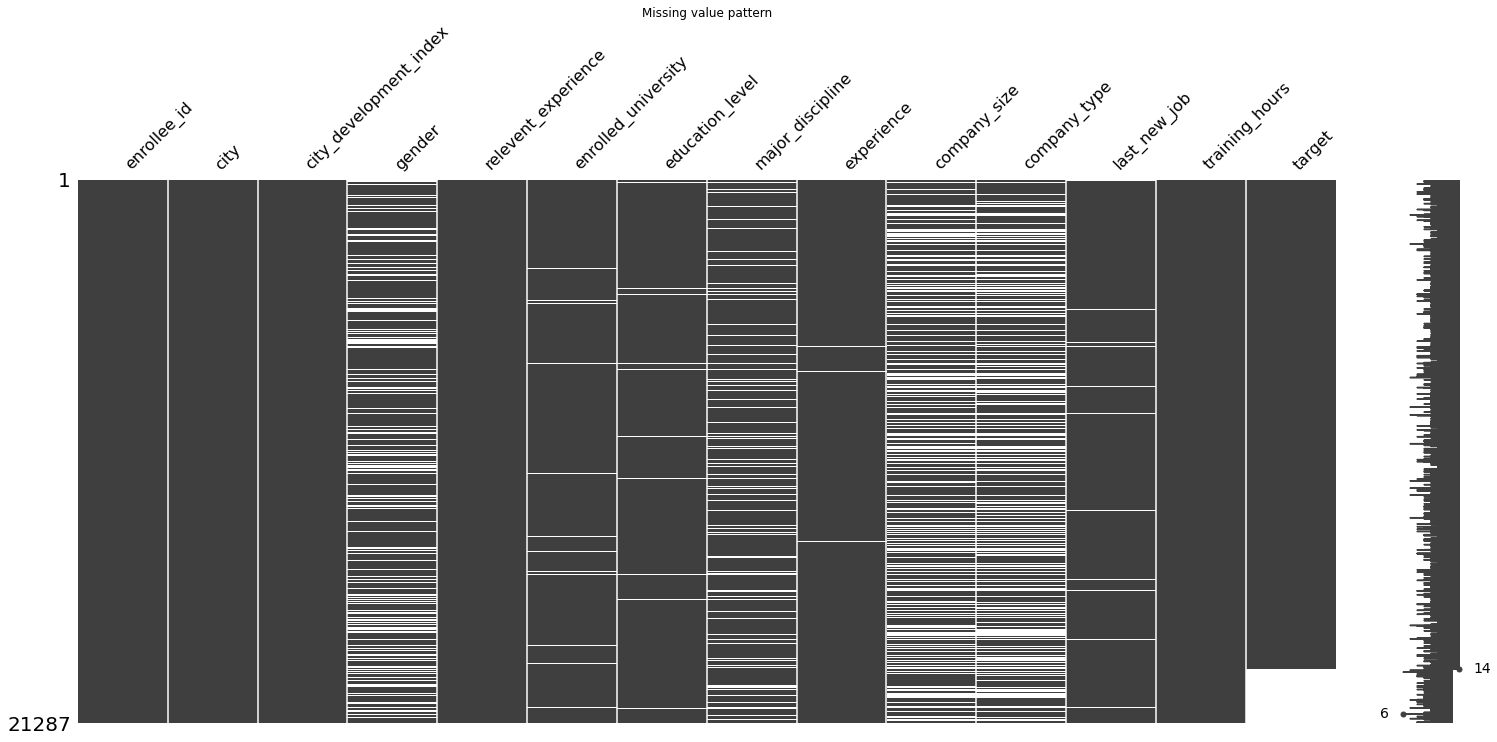

In [36]:
msno.matrix(train)
plt.title("Missing value pattern")
plt.show()

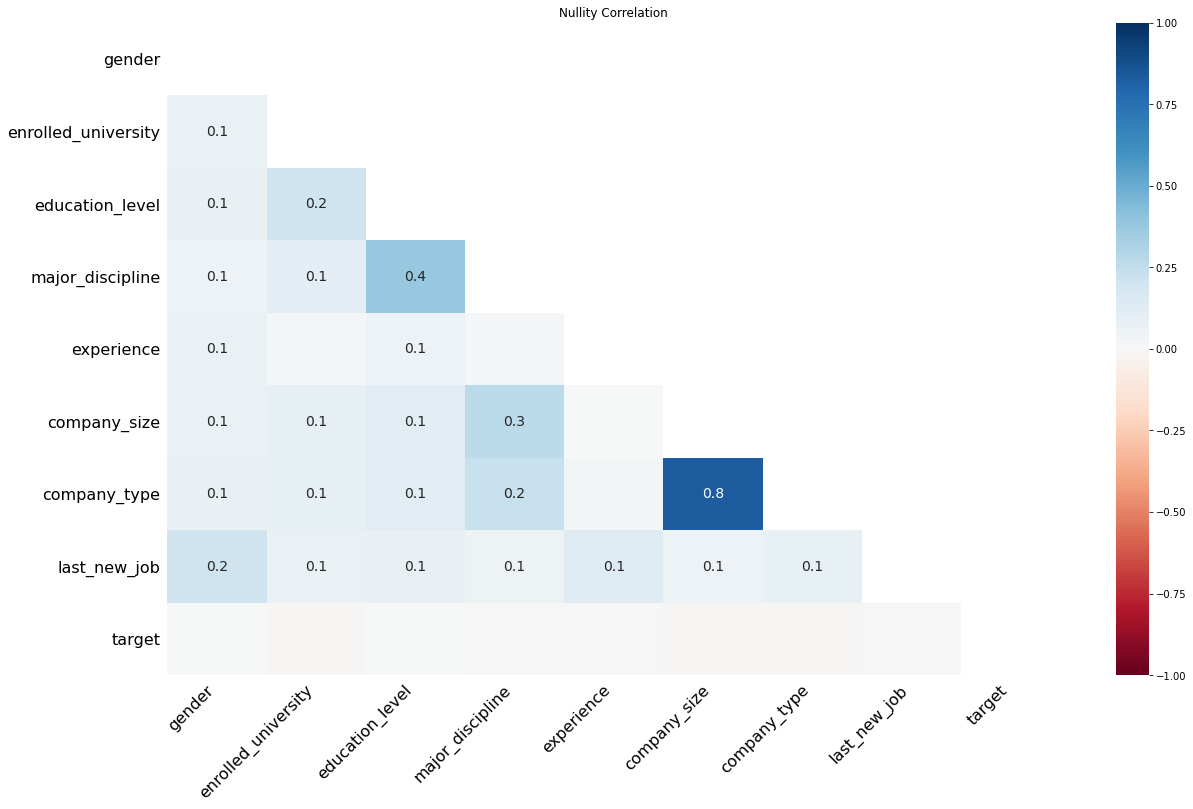

In [37]:
msno.heatmap(train)
plt.title("Nullity Correlation")
plt.show()

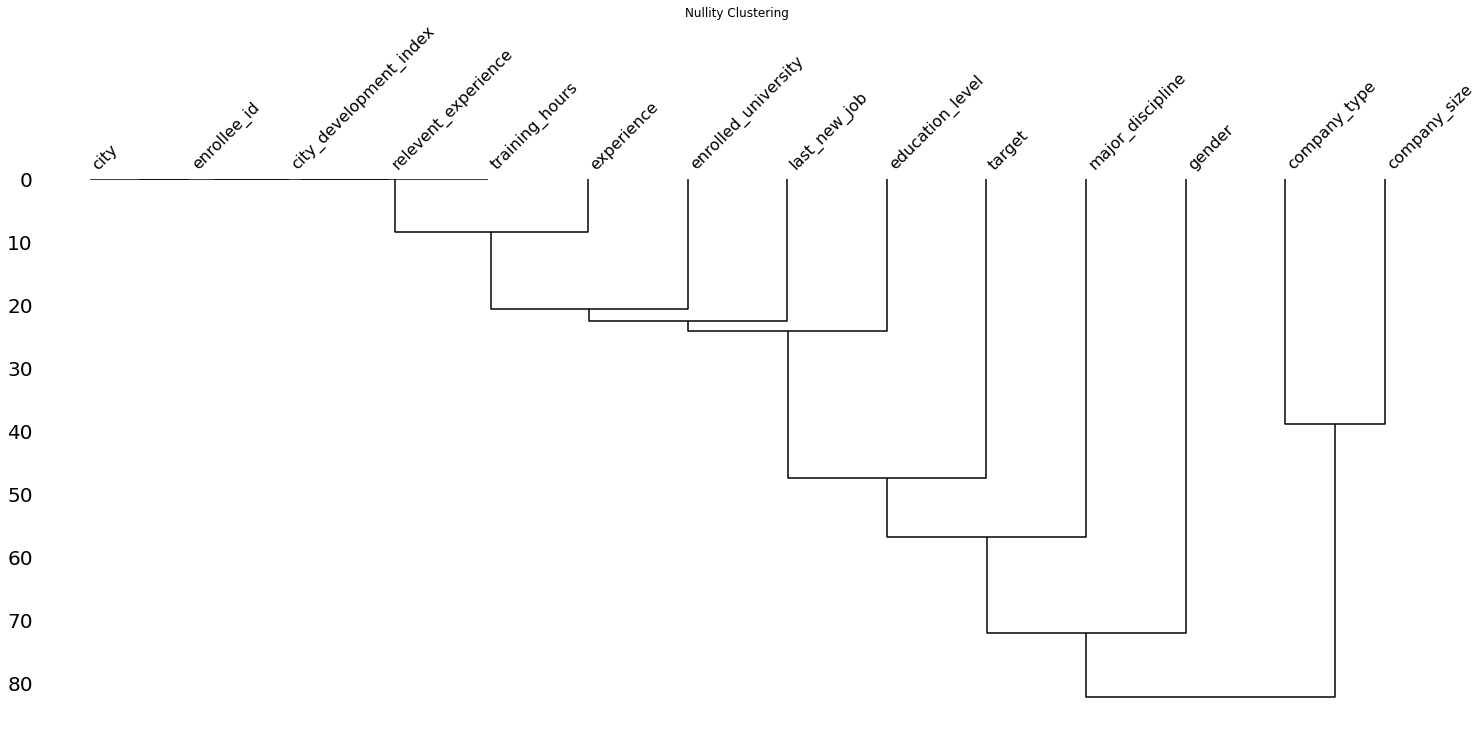

In [38]:
msno.dendrogram(train)
plt.title("Nullity Clustering")
plt.show()

# Data Pre-processing

In [39]:
train.dropna(subset=["experience"], inplace=True)
train.dropna(subset=["enrolled_university"], inplace=True)
train.dropna(subset=["last_new_job"], inplace=True)
train.dropna(subset=["education_level"], inplace=True)

*Dropping null record of column having very few null record*

In [40]:
missing_val = missing_value(train)
missing_val

5 columns having missing value




,missing_value,ratio%
target,2018,10.07
major_discipline,2471,12.34
gender,4306,21.5
company_size,5887,29.39
company_type,6055,30.23


In [41]:
print("NULL records in experience --> ",train["experience"].isnull().sum())
print("NULL records in enrolled_university --> ",train["enrolled_university"].isnull().sum())
print("NULL records in last_new_job --> ",train["last_new_job"].isnull().sum())
print("NULL records in education_level --> ",train["education_level"].isnull().sum())

NULL records in experience -->  0
NULL records in enrolled_university -->  0
NULL records in last_new_job -->  0
NULL records in education_level -->  0


In [42]:
print("most repetetive in major discipline ----> ", train['major_discipline'].value_counts().index[0])
train['major_discipline'].fillna(method='ffill',limit=3,inplace=True)
print("NULL records in major discipline --> ",train["major_discipline"].isnull().sum())

most repetetive in major discipline ---->  STEM
NULL records in major discipline -->  3


In [43]:
train.dropna(subset=["major_discipline"], inplace=True)
print("NULL records in major discipline --> ",train["major_discipline"].isnull().sum())

NULL records in major discipline -->  0


In [44]:
print("most repetetive in gender ----> ", train['gender'].value_counts().index[0])
train['gender'].fillna(method='ffill',limit=3,inplace=True)
print("NULL records in gender --> ",train["gender"].isnull().sum())

most repetetive in gender ---->  Male
NULL records in gender -->  48


In [45]:
train.dropna(subset=["gender"], inplace=True)
print("NULL records in gender --> ",train["gender"].isnull().sum())

NULL records in gender -->  0


In [46]:
print("most repetetive in company size ----> ", train['company_size'].value_counts().index[0])
train['company_size'].fillna(method='ffill',limit=3,inplace=True)
print("NULL records in company size --> ",train["company_size"].isnull().sum())

most repetetive in company size ---->  50-99
NULL records in company size -->  117


In [47]:
train.dropna(subset=["company_size"], inplace=True)
print("NULL records in company size --> ",train["company_size"].isnull().sum())

NULL records in company size -->  0


In [48]:
print("most repetetive in company_type ----> ", train['company_type'].value_counts().index[0])
train['company_type'].fillna(method='ffill',limit=3,inplace=True)
print("NULL records in company_type --> ",train["company_type"].isnull().sum())

most repetetive in company_type ---->  Pvt Ltd
NULL records in company_type -->  72


In [49]:
train.dropna(subset=["company_type"], inplace=True)
print("NULL records in company type --> ",train["company_type"].isnull().sum())

NULL records in company type -->  0


# Feature Engineering

In [50]:
train['gender'] = train['gender'].apply(lambda x:0 if x == 'Male' else 1 if x == 'Female' else 2)

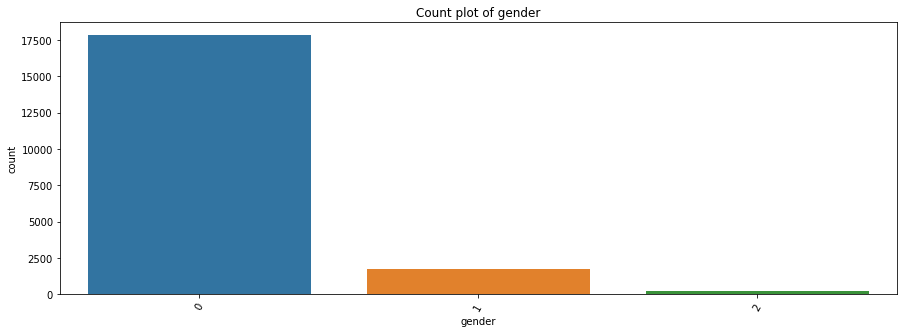

In [51]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="gender", data = train, ax=axes)
plt.xticks(rotation = 60)
plt.title('Count plot of gender')
plt.show()

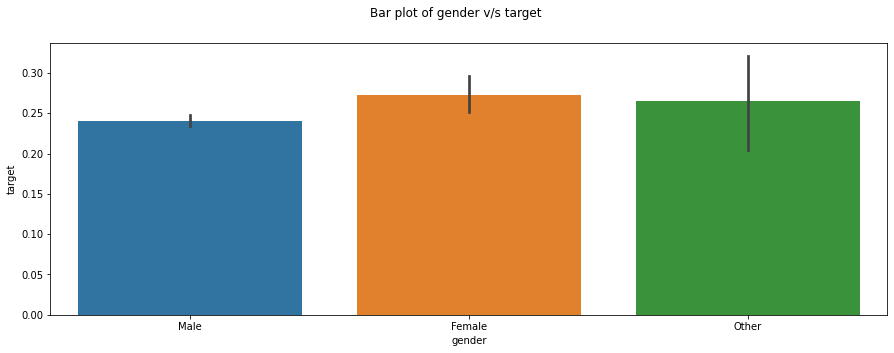

In [52]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='gender',y='target',data=train, ax=axes)
plot.set_xticklabels(["Male","Female","Other"])
fig.suptitle('Bar plot of gender v/s target')
plt.show()

In [53]:
train['relevent_experience'] = train['relevent_experience'].apply(lambda x:0 if x == 'Has relevent experience' else 1)

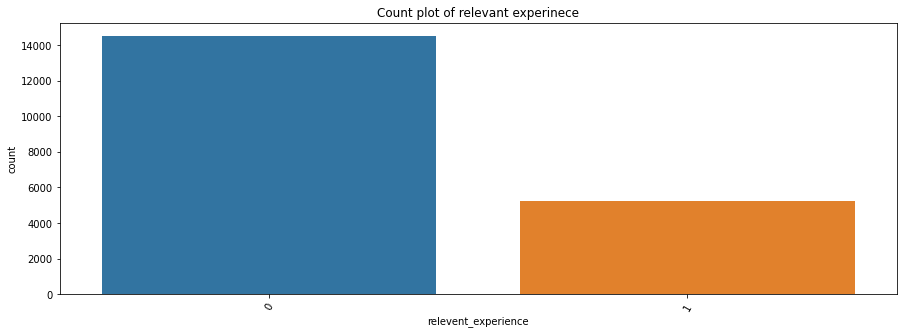

In [54]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="relevent_experience", data = train,ax=axes)
plt.title('Count plot of relevant experinece')
plt.xticks(rotation = 60)
plt.show()

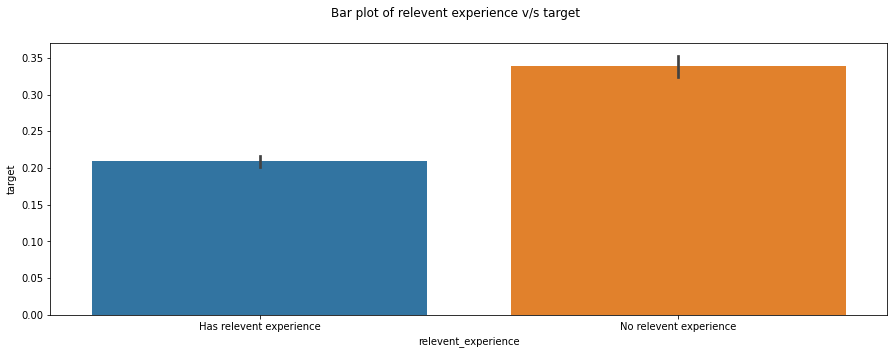

In [55]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='relevent_experience',y='target',data=train, ax=axes)
plot.set_xticklabels(["Has relevent experience","No relevent experience"])
fig.suptitle('Bar plot of relevent experience v/s target')
plt.show()

In [56]:
train['enrolled_university'] = train['enrolled_university'].apply(lambda x:0 if x == 'no_enrollment' else 1 if x == 'Full time course' else 2)

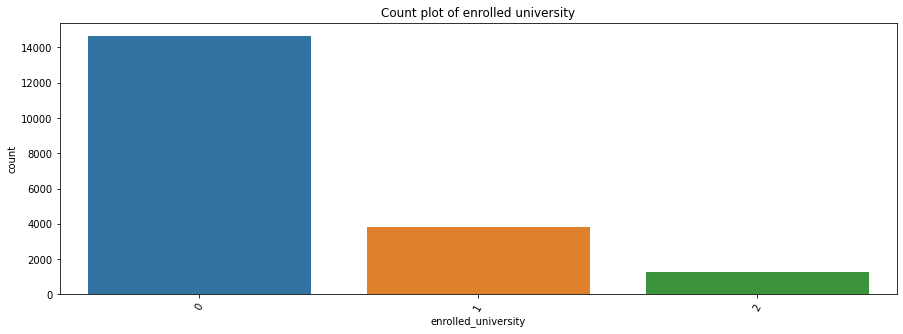

In [57]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="enrolled_university", data = train,ax=axes)
plt.title('Count plot of enrolled university')
plt.xticks(rotation = 60)
plt.show()

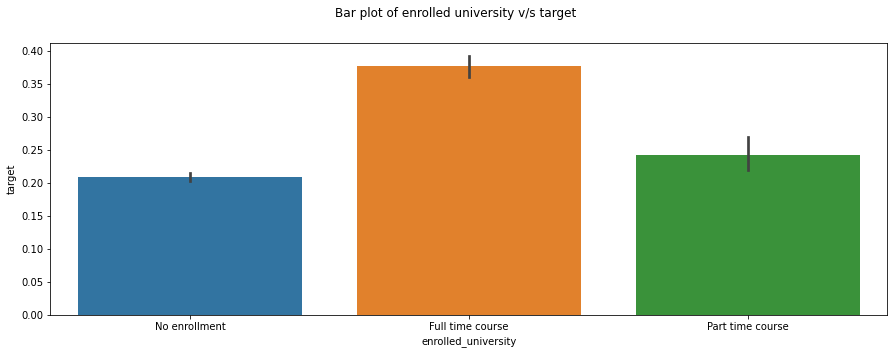

In [58]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='enrolled_university',y='target',data=train, ax=axes)
plot.set_xticklabels(["No enrollment","Full time course", "Part time course"])
fig.suptitle('Bar plot of enrolled university v/s target')
plt.show()

In [59]:
train['education_level'] = train['education_level'].apply(lambda x:0 if x == 'Graduate' else 1 if x == 'Masters' else 2 if x == 'High School'\
                                                         else 3 if x == "Phd" else 4)

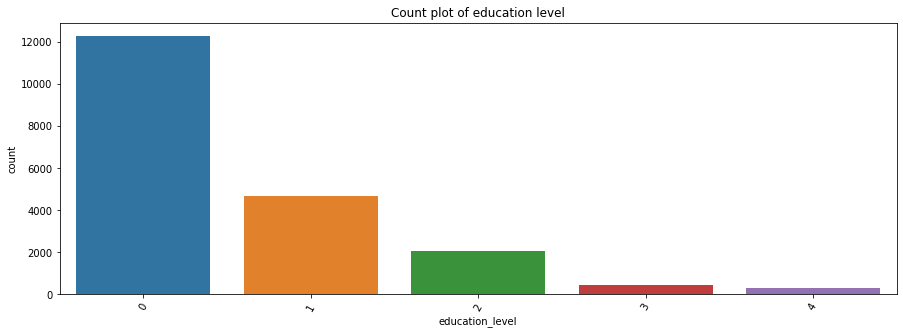

In [60]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="education_level", data = train,ax=axes)
plt.title('Count plot of education level')
plt.xticks(rotation = 60)
plt.show()

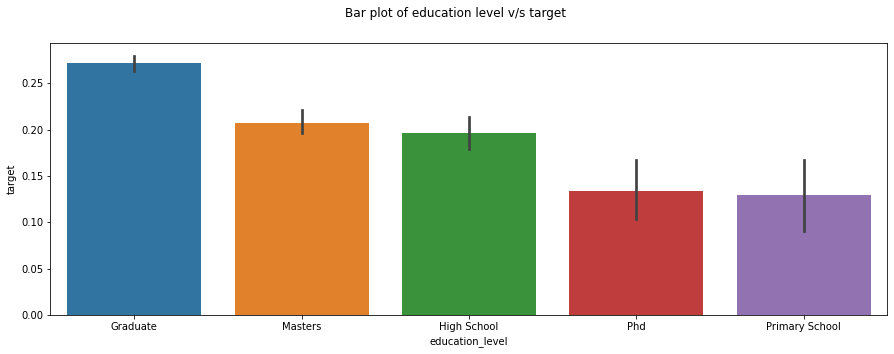

In [61]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='education_level',y='target',data=train, ax=axes)
plot.set_xticklabels(['Graduate','Masters','High School','Phd','Primary School'])
fig.suptitle('Bar plot of education level v/s target')
plt.show()

In [62]:
train["major_discipline"] = train['major_discipline'].apply(lambda i:0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 )

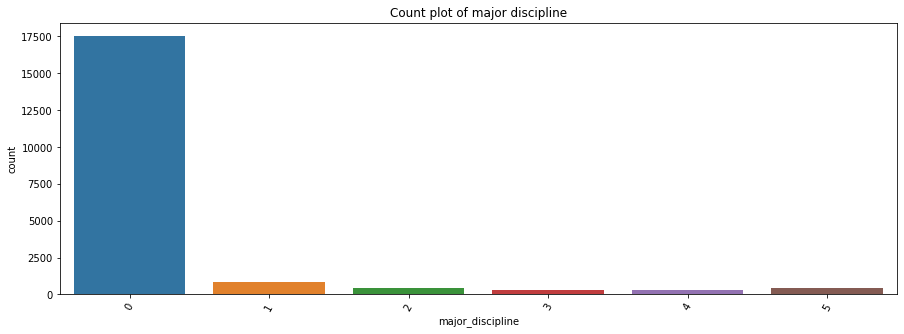

In [63]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="major_discipline", data = train,ax=axes)
plt.title('Count plot of major discipline')
plt.xticks(rotation = 60)
plt.show()

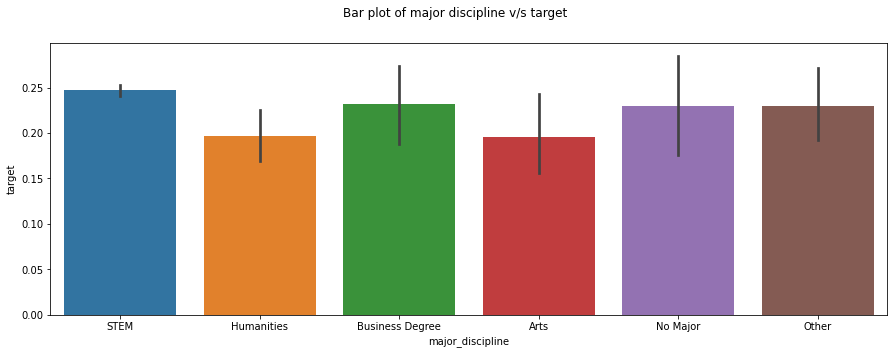

In [64]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='major_discipline',y='target',data=train, ax=axes)
plot.set_xticklabels(['STEM','Humanities','Business Degree','Arts','No Major','Other'])
fig.suptitle('Bar plot of major discipline v/s target')
plt.show()

In [65]:
train["experience"] = train['experience'].apply(lambda i:0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2)

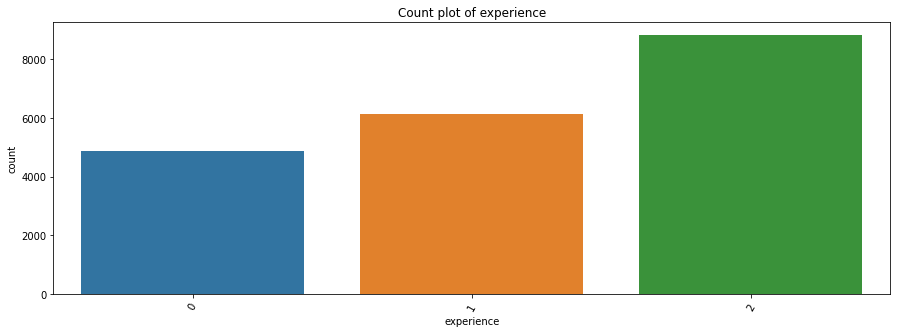

In [66]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="experience", data = train,ax=axes)
plt.title('Count plot of experience')
plt.xticks(rotation = 60)
plt.show()

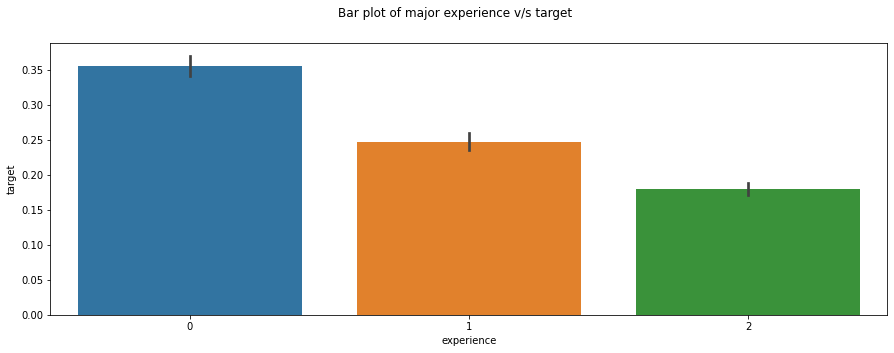

In [67]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='experience',y='target',data=train, ax=axes)
fig.suptitle('Bar plot of major experience v/s target')
plt.show()

In [68]:
train["company_size"] = train['company_size'].apply(lambda i:0 if i == "10/49" else 1)

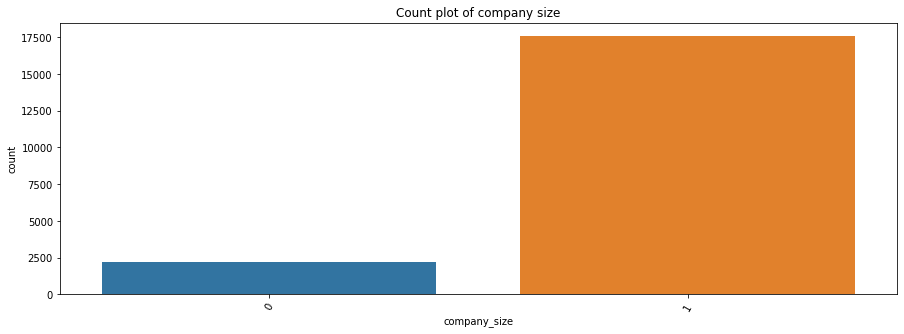

In [69]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="company_size", data = train,ax=axes)
plt.title('Count plot of company size')
plt.xticks(rotation = 60)
plt.show()

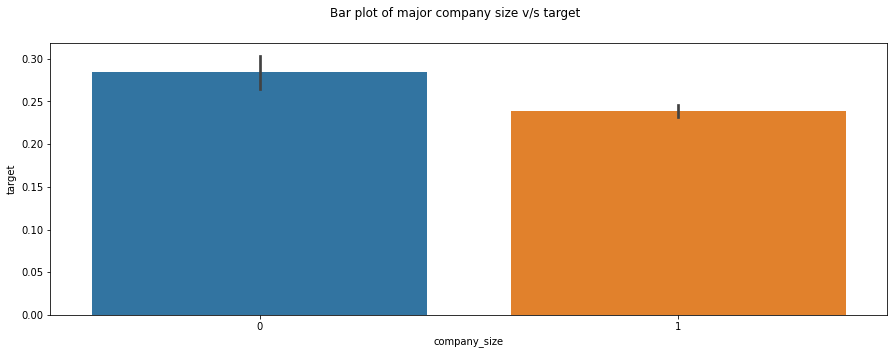

In [70]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='company_size',y='target',data=train, ax=axes)
fig.suptitle('Bar plot of major company size v/s target')
plt.show()

In [71]:
train["company_type"] = train['company_type'].apply(lambda i:0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5)

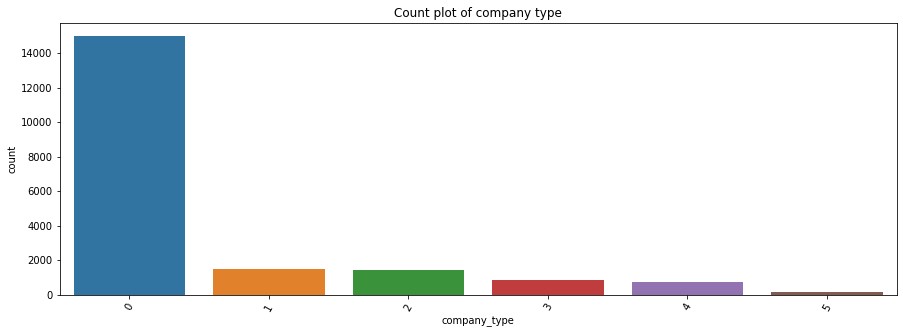

In [72]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="company_type", data = train,ax=axes)
plt.title('Count plot of company type')
plt.xticks(rotation = 60)
plt.show()

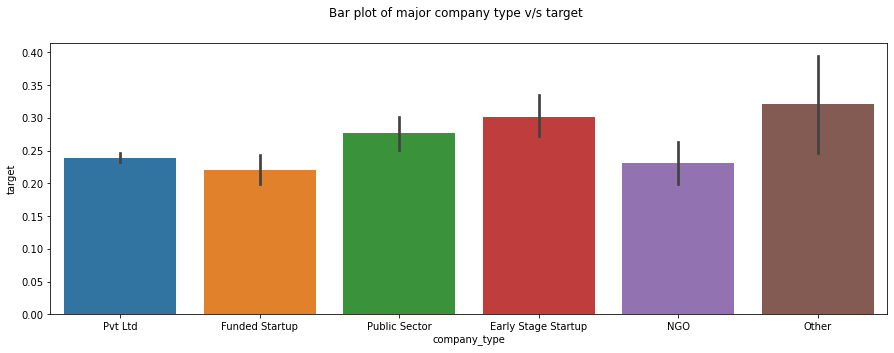

In [73]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='company_type',y='target',data=train, ax=axes)
plot.set_xticklabels(['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other'])
fig.suptitle('Bar plot of major company type v/s target')
plt.show()

In [74]:
train["last_new_job"] = train['last_new_job'].apply(lambda i:0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5)

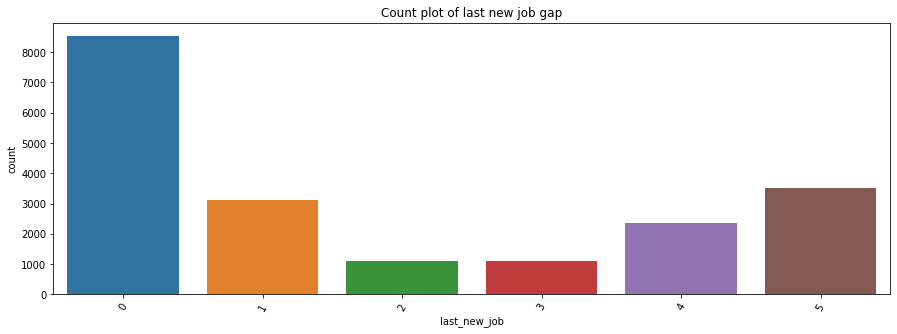

In [75]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x="last_new_job", data = train,ax=axes)
plt.title('Count plot of last new job gap')
plt.xticks(rotation = 60)
plt.show()

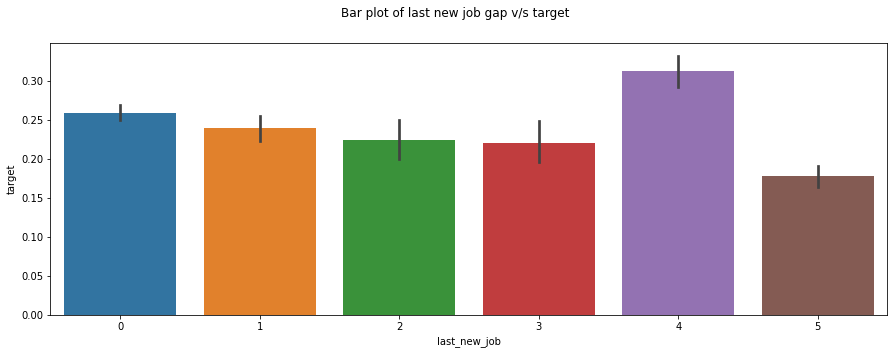

In [76]:
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='last_new_job',y='target',data=train, ax=axes)
fig.suptitle('Bar plot of last new job gap v/s target')
plt.show()

In [77]:
le = LabelEncoder()
train['city'] = le.fit_transform(train['city'])

In [78]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,77,0.776,0,1,0,0,0,2,1,0,5,47,0.0
2,11561,64,0.624,0,1,1,0,0,2,1,0,4,83,0.0
4,666,50,0.767,0,0,0,1,0,2,1,1,3,8,0.0
5,21651,57,0.764,0,0,2,0,0,1,1,1,0,24,1.0
6,28806,49,0.920,0,0,0,2,0,2,1,1,0,24,0.0


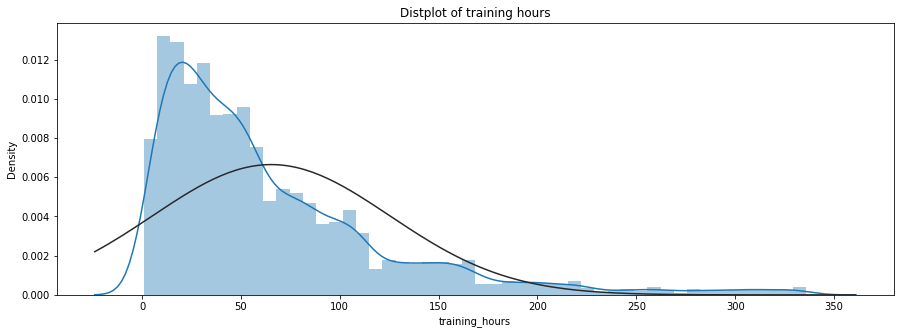

In [79]:
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(train['training_hours'],kde=True,fit=norm,ax=axes)
plt.title('Distplot of training hours')
plt.show()

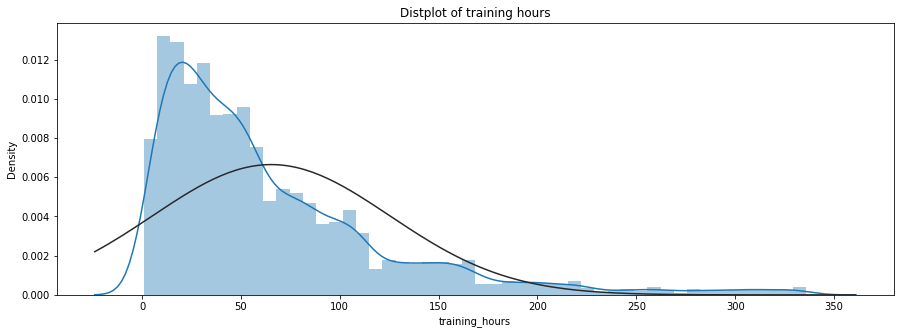



mean: 65.314 and signma: 60.049 of training hours


In [80]:
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(train['training_hours'],kde=True,fit=norm,ax=axes)
plt.title('Distplot of training hours')
plt.show()
(mean, sigma) = norm.fit(train["training_hours"])
print(f"\n\nmean: {mean:.3f} and signma: {sigma:.3f} of training hours")

In [81]:
train['training_hours'], lmbda = boxcox(train['training_hours'])

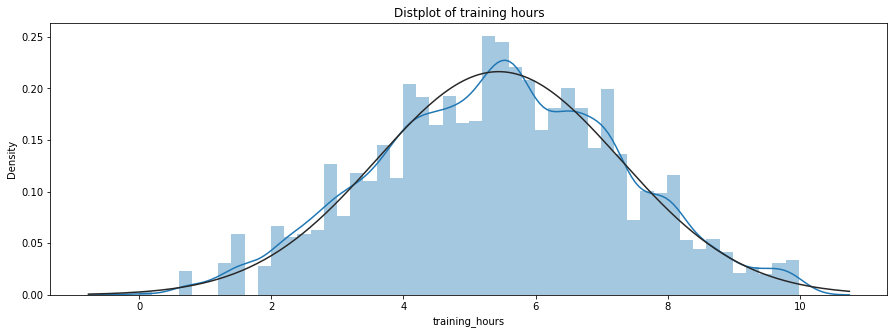



mean: 5.440 and signma: 1.844 of training hours


In [82]:
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(train['training_hours'],kde=True,fit=norm,ax=axes)
plt.title('Distplot of training hours')
plt.show()
(mean, sigma) = norm.fit(train["training_hours"])
print(f"\n\nmean: {mean:.3f} and signma: {sigma:.3f} of training hours")

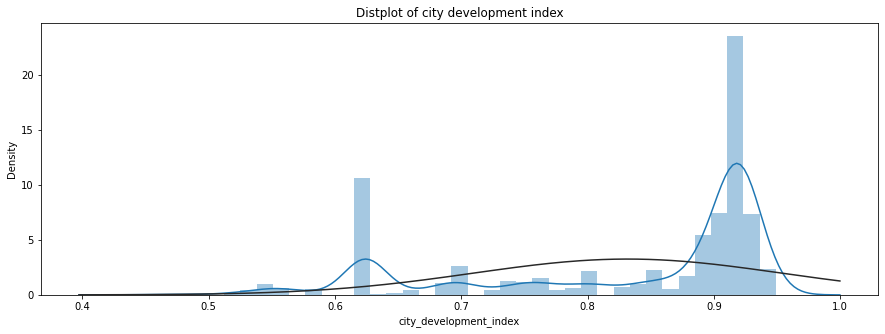



mean: 0.832 and signma: 0.122 of city development index


In [83]:
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(train['city_development_index'],kde=True,fit=norm,ax=axes)
plt.title('Distplot of city development index')
plt.show()
(mean, sigma) = norm.fit(train["city_development_index"])
print(f"\n\nmean: {mean:.3f} and signma: {sigma:.3f} of city development index")

In [84]:
train['city_development_index'], lmbda = boxcox(train['city_development_index'])

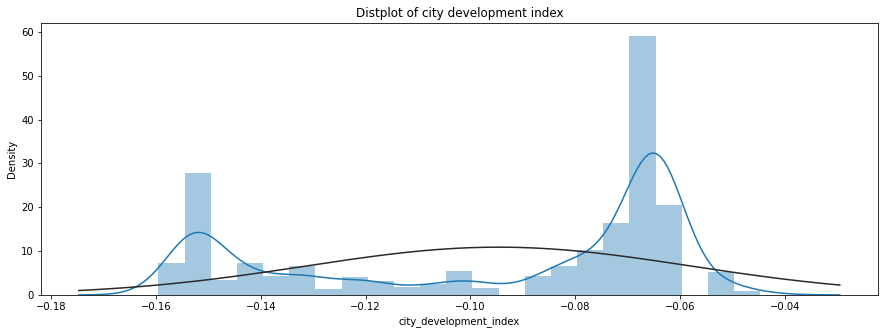



mean: -0.095 and signma: 0.037 of city development index


In [85]:
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(train['city_development_index'],kde=True,fit=norm,ax=axes)
plt.title('Distplot of city development index')
plt.show()
(mean, sigma) = norm.fit(train["city_development_index"])
print(f"\n\nmean: {mean:.3f} and signma: {sigma:.3f} of city development index")